Coefficients: 
 [[ 283.96855737]]
61940787221.5
Variance score: 0.48


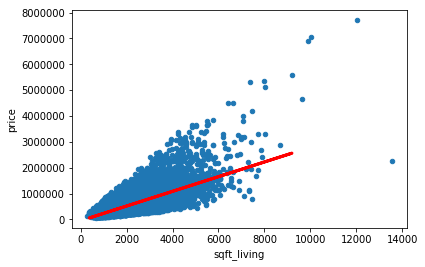

Coefficients: 
 [[   316.73894154 -55220.29641829  11630.95508462    641.74449094]]
59712434572.3
Variance score: 0.50


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 26 19:40:46 2017

@author: Aditya
"""

import pandas as pd 
import sklearn.linear_model as lm 
from sklearn.metrics import mean_squared_error, r2_score

import  matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as sp 



def size_based_prediction ():
    
    home_df = pd.read_csv ('home_data.csv'  )
    
    home_df = home_df.set_index (['id'])
    
    size_feature_df  = home_df[['sqft_living']]
    
    price_df = home_df[['price']]
    
    ax = home_df.plot(kind = 'scatter', x = 'sqft_living' , y = 'price')
    
    
    x_train, x_test, y_train, y_test = sp (size_feature_df,price_df,train_size=0.8, 
                                       test_size = 0.2, random_state = 0)
    
    model_1 = lm.LinearRegression(fit_intercept=True,normalize = False)
    
    model_1.fit ( x_train,y_train)
    
    predicted_values = model_1.predict(x_test)
    
    print('Coefficients: \n', model_1.coef_)
    
    print( mean_squared_error(y_test, predicted_values))
    
    print('Variance score: %.2f' % r2_score(y_test, predicted_values))
    
    ax.plot(x_test, predicted_values, color='red', linewidth=3)
    
    plt.show()



def feature_based_house_price_prediction ():
    
    home_df = pd.read_csv ('home_data.csv'  )
    
    home_df = home_df.set_index (['id'])
    
    #print (home_df.head (1))
    
    #feature_selection = ['sqft_living','bedrooms','bathrooms' ,'sqft_lot', 'zipcode']
    
    features_df = home_df[['sqft_living','bedrooms','bathrooms' , 'zipcode']]
    
    price_df = home_df[['price']]
    
    x_train, x_test, y_train, y_test = sp (features_df,price_df,train_size=0.8, 
                                       test_size = 0.2, random_state = 0)
    
    model_1 = lm.LinearRegression(fit_intercept=True,normalize = True)
    
    model_1.fit ( x_train,y_train)
    
    predicted_values = model_1.predict(x_test)
    
    print('Coefficients: \n', model_1.coef_)
    
    print( mean_squared_error(y_test, predicted_values))
    
    print('Variance score: %.2f' % r2_score(y_test, predicted_values))
    
    
    
    
    
    
size_based_prediction()
    
feature_based_house_price_prediction ()